<a href="https://colab.research.google.com/github/BorysZhyhalo/All-Python-codes-of-ZTM-course-by-Andrei-Neagoie/blob/master/Lesson9_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train, Validation, Test split


*   scikit-learn
*   pandas
*   NumPy


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
y_col = dataset['target_names'][0]
df[y_col] = dataset['target']
x_cols = dataset['feature_names']
del dataset

Sklearn train_test_split
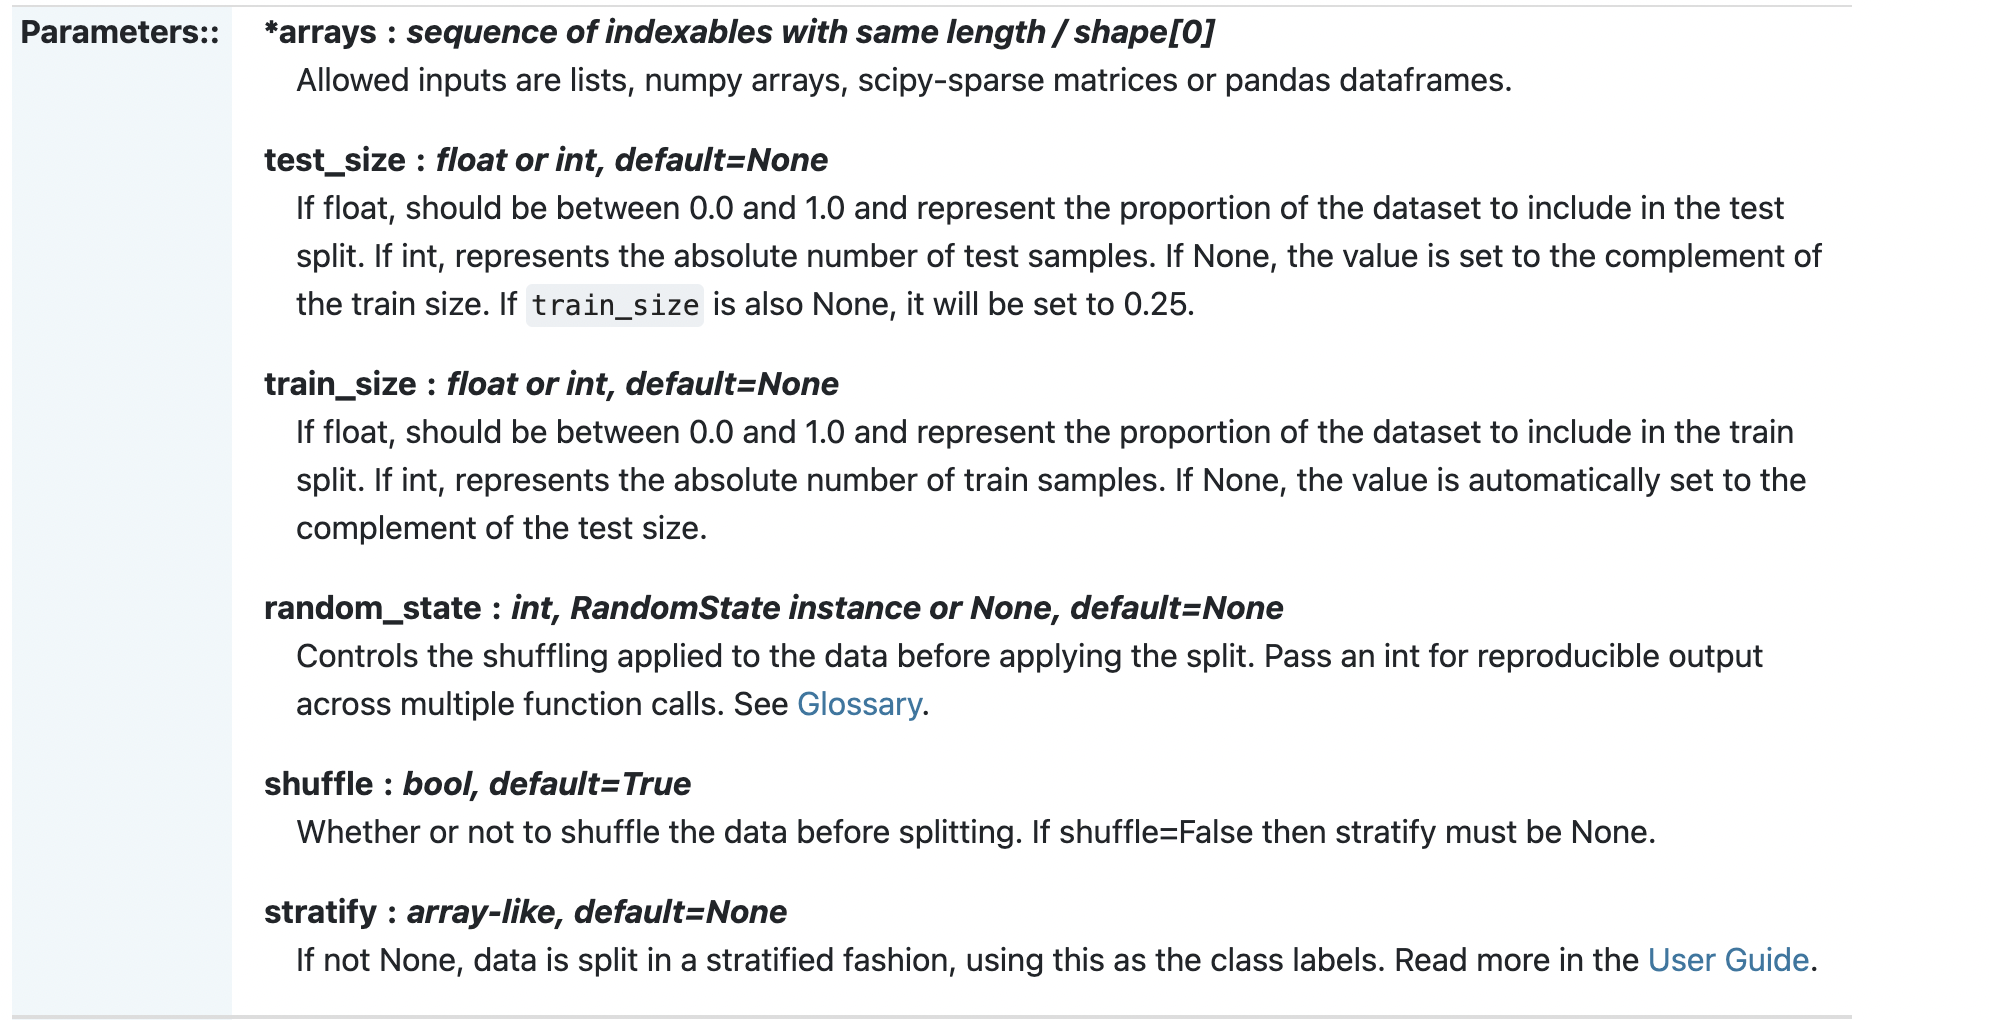

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[x_cols], df[y_col],test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

pandas.DataFrame.sample. [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)

In [ ]:
df_train = df.sample(frac=0.8, random_state=1)
df_test=df.drop(df_train.index)
df_train.shape, df_test.shape

((16512, 9), (4128, 9))

NumPy [random.rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)
Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).

In [ ]:
import numpy as np
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
mask

array([ True, False,  True, ..., False, False,  True])

In [ ]:
df_train.shape, df_test.shape

((16452, 9), (4188, 9))

# Cross Validation

## k-fold Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array([[101, 202], [303, 404], [102, 204], [306, 408]])
y = np.array([101, 202, 303, 404])

In [ ]:
X

array([[101, 202],
       [303, 404],
       [102, 204],
       [306, 408]])

In [ ]:
kf = KFold(n_splits=2)

In [ ]:
kf.split(X)

<generator object _BaseKFold.split at 0x78ef1d1a5c40>

In [ ]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


## Leave-one-out

In [ ]:
from sklearn.model_selection import LeaveOneOut

X = np.array([[101, 202], [303, 404], [102, 204], [306, 408]])
y = np.array([101, 202, 303, 404])
loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


## Stratified k-fold

In [ ]:
from sklearn.model_selection import StratifiedKFold

X = np.array([[101, 202], [102, 204], [303, 404], [306, 408]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


#  Пошук оптимальних гіперпараметрів

Завантажимо набір даних.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def get_indices(X):
    train_id, test_id = train_test_split(X.index, test_size=test_size, shuffle=True, random_state=42)
    # train_id, val_id = train_test_split(train_full_id, test_size=test_size, shuffle=True, random_state=42)
    return train_id, test_id

def get_metrics(y_true, y_predicted, n_digits=5):
    params = dict(y_true=y_true, y_pred=y_predicted)
    mse = mean_squared_error(**params)
    rmse = mean_squared_error(**params, squared=False)
    return dict(mse=round(mse, n_digits), rmse=round(rmse, n_digits))

In [ ]:
dataset = fetch_california_housing()
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
target_col_name = dataset['target_names'][0]
df[target_col_name] = dataset['target']
del dataset

In [ ]:
X = df.drop([target_col_name],axis=1)
y = df[target_col_name]

In [ ]:
test_size = 0.2

train_id, test_id = get_indices(X)

## Grid search

[sklearn.pipeline.Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification.

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('model', Lasso())
])

[sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


**param_grid**

dict or list of dictionaries
Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.

In [ ]:
np.arange(0,10,0.1).shape

(100,)

[Scoring parameters](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

In [ ]:
search = GridSearchCV(
    pipeline,
    {'model__alpha':np.arange(0,10,0.1), 'poly_features__degree': [1, 2, 3]},
    cv = 5,
    scoring="neg_mean_squared_error",
    verbose=3
)

In [ ]:
from datetime import datetime
start = datetime.now()
search.fit(X.loc[train_id], y.loc[train_id])
end = datetime.now()
time_delta = (end-start).total_seconds()

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END model__alpha=0.0, poly_features__degree=1;, score=-0.520 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.418e+03, tolerance: 1.755e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

[CV 2/5] END model__alpha=0.0, poly_features__degree=1;, score=-0.502 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.417e+03, tolerance: 1.763e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

[CV 3/5] END model__alpha=0.0, poly_features__degree=1;, score=-0.521 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.441e+03, tolerance: 1.776e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coor

[CV 4/5] END model__alpha=0.0, poly_features__degree=1;, score=-0.508 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.376e+03, tolerance: 1.757e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coor

[CV 5/5] END model__alpha=0.0, poly_features__degree=1;, score=-0.546 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.783e+03, tolerance: 1.755e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coor

[CV 1/5] END model__alpha=0.0, poly_features__degree=2;, score=-0.426 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.784e+03, tolerance: 1.779e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coor

[CV 2/5] END model__alpha=0.0, poly_features__degree=2;, score=-0.689 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.718e+03, tolerance: 1.763e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coor

[CV 3/5] END model__alpha=0.0, poly_features__degree=2;, score=-45.927 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.828e+03, tolerance: 1.776e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coor

[CV 4/5] END model__alpha=0.0, poly_features__degree=2;, score=-0.813 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.733e+03, tolerance: 1.757e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coor

[CV 5/5] END model__alpha=0.0, poly_features__degree=2;, score=-1.926 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.514e+03, tolerance: 1.755e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coor

[CV 1/5] END model__alpha=0.0, poly_features__degree=3;, score=-0.409 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.541e+03, tolerance: 1.779e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coor

[CV 2/5] END model__alpha=0.0, poly_features__degree=3;, score=-0.727 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.420e+03, tolerance: 1.763e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coor

[CV 3/5] END model__alpha=0.0, poly_features__degree=3;, score=-157.028 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.532e+03, tolerance: 1.776e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coor

[CV 4/5] END model__alpha=0.0, poly_features__degree=3;, score=-14.899 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.473e+03, tolerance: 1.757e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=0.0, poly_features__degree=3;, score=-0.448 total time=   3.6s
[CV 1/5] END model__alpha=0.1, poly_features__degree=1;, score=-0.684 total time=   0.0s
[CV 2/5] END model__alpha=0.1, poly_features__degree=1;, score=-0.648 total time=   0.0s
[CV 3/5] END model__alpha=0.1, poly_features__degree=1;, score=-0.681 total time=   0.0s
[CV 4/5] END model__alpha=0.1, poly_features__degree=1;, score=-0.665 total time=   0.0s
[CV 5/5] END model__alpha=0.1, poly_features__degree=1;, score=-0.683 total time=   0.0s
[CV 1/5] END model__alpha=0.1, poly_features__degree=2;, score=-0.680 total time=   0.1s
[CV 2/5] END model__alpha=0.1, poly_features__degree=2;, score=-0.645 total time=   0.1s
[CV 3/5] END model__alpha=0.1, poly_features__degree=2;, score=-0.675 total time=   0.1s
[CV 4/5] END model__alpha=0.1, poly_features__degree=2;, score=-0.663 total time=   0.1s
[CV 5/5] END model__alpha=0.1, poly_features__degree=2;, score=-0.680 total time=   0.0s
[CV 1/5] END model__a

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.721e+02, tolerance: 1.779e+00
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=0.1, poly_features__degree=3;, score=-0.595 total time=   2.0s
[CV 3/5] END model__alpha=0.1, poly_features__degree=3;, score=-0.660 total time=   1.6s
[CV 4/5] END model__alpha=0.1, poly_features__degree=3;, score=-0.788 total time=   0.3s
[CV 5/5] END model__alpha=0.1, poly_features__degree=3;, score=-0.626 total time=   0.3s
[CV 1/5] END model__alpha=0.2, poly_features__degree=1;, score=-0.757 total time=   0.0s
[CV 2/5] END model__alpha=0.2, poly_features__degree=1;, score=-0.713 total time=   0.0s
[CV 3/5] END model__alpha=0.2, poly_features__degree=1;, score=-0.745 total time=   0.0s
[CV 4/5] END model__alpha=0.2, poly_features__degree=1;, score=-0.730 total time=   0.0s
[CV 5/5] END model__alpha=0.2, poly_features__degree=1;, score=-0.750 total time=   0.0s
[CV 1/5] END model__alpha=0.2, poly_features__degree=2;, score=-0.757 total time=   0.1s
[CV 2/5] END model__alpha=0.2, poly_features__degree=2;, score=-0.713 total time=   0.1s
[CV 3/5] END model__a

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.052e+00, tolerance: 1.755e+00
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=0.2, poly_features__degree=3;, score=-0.698 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.670e+01, tolerance: 1.779e+00
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=0.2, poly_features__degree=3;, score=-0.658 total time=   2.1s
[CV 3/5] END model__alpha=0.2, poly_features__degree=3;, score=-0.710 total time=   0.6s
[CV 4/5] END model__alpha=0.2, poly_features__degree=3;, score=-0.758 total time=   0.2s
[CV 5/5] END model__alpha=0.2, poly_features__degree=3;, score=-0.693 total time=   0.4s
[CV 1/5] END model__alpha=0.30000000000000004, poly_features__degree=1;, score=-0.812 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004, poly_features__degree=1;, score=-0.762 total time=   0.0s
[CV 3/5] END model__alpha=0.30000000000000004, poly_features__degree=1;, score=-0.794 total time=   0.0s
[CV 4/5] END model__alpha=0.30000000000000004, poly_features__degree=1;, score=-0.777 total time=   0.0s
[CV 5/5] END model__alpha=0.30000000000000004, poly_features__degree=1;, score=-0.801 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004, poly_features__degree=2;, score=-0.815 total time=   0.0s
[CV 2/5] END m

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.786e+00, tolerance: 1.779e+00
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=0.30000000000000004, poly_features__degree=3;, score=-0.757 total time=   2.2s
[CV 3/5] END model__alpha=0.30000000000000004, poly_features__degree=3;, score=-0.806 total time=   0.6s
[CV 4/5] END model__alpha=0.30000000000000004, poly_features__degree=3;, score=-0.824 total time=   0.2s
[CV 5/5] END model__alpha=0.30000000000000004, poly_features__degree=3;, score=-0.794 total time=   0.4s
[CV 1/5] END model__alpha=0.4, poly_features__degree=1;, score=-0.886 total time=   0.0s
[CV 2/5] END model__alpha=0.4, poly_features__degree=1;, score=-0.829 total time=   0.0s
[CV 3/5] END model__alpha=0.4, poly_features__degree=1;, score=-0.864 total time=   0.0s
[CV 4/5] END model__alpha=0.4, poly_features__degree=1;, score=-0.844 total time=   0.0s
[CV 5/5] END model__alpha=0.4, poly_features__degree=1;, score=-0.873 total time=   0.0s
[CV 1/5] END model__alpha=0.4, poly_features__degree=2;, score=-0.898 total time=   0.0s
[CV 2/5] END model__alpha=0.4, poly_features__

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.276e+03, tolerance: 2.207e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

In [ ]:
print(time_delta)

229.50017


In [ ]:
search.best_params_

{'model__alpha': 0.0, 'poly_features__degree': 1}

In [ ]:
search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(degree=1)),
                ('model', Lasso(alpha=0.0))])

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [ ]:
coefficients.round(2)

array([ 0.  ,  0.85,  0.12, -0.29,  0.34, -0.  , -0.04, -0.9 , -0.87])

Давайте дізнаємося, що за коефіцієнти найзначніші:

In [ ]:
feature_names = search.best_estimator_.named_steps['poly_features'].get_feature_names_out()
coef_df = pd.DataFrame(zip(feature_names, coefficients.round(3)), columns=['feature_name', 'coef'])

In [ ]:
coef_df.sort_values('coef', ascending=False)[:10]

,feature_name,coef
1,x0,0.854
4,x3,0.339
2,x1,0.123
0,1,0.000
5,x4,-0.002
6,x5,-0.041
3,x2,-0.294
8,x7,-0.870
7,x6,-0.897


Словник з назвами ознак:

In [ ]:
X.columns.to_frame().reset_index(drop=True).to_dict()[0]

{0: 'MedInc',
 1: 'HouseAge',
 2: 'AveRooms',
 3: 'AveBedrms',
 4: 'Population',
 5: 'AveOccup',
 6: 'Latitude',
 7: 'Longitude'}

Бачимо, що все одно найважливіша ознака – MedInc без жодних ступенів.

In [ ]:
search.best_score_

-0.5192652011433679

In [ ]:
best_model = search.best_estimator_

y_train_pred = best_model.predict(X.loc[train_id])
y_test_pred = best_model.predict(X.loc[test_id])
train_metrics = get_metrics(y.loc[train_id], y_train_pred)
test_metrics = get_metrics(y.loc[test_id], y_test_pred)

In [ ]:
train_metrics, test_metrics

({'mse': 0.51793, 'rmse': 0.71968}, {'mse': 0.55589, 'rmse': 0.74558})

## Random Search

[sklearn.model_selection.RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = dict()

# значення alpha: 100 значень між e^-5 и e^5
params['alpha'] =  np.logspace(-5, 5, 100, endpoint=True)

# значення  l1_ratio: 100 значень між 0 и 1
params['l1_ratio'] = np.arange(0, 1, 0.01)

In [ ]:
len(params['alpha'])*len(params['l1_ratio'])

10000

In [ ]:
model = ElasticNet()

In [ ]:
search = RandomizedSearchCV(
    model,
    params,
    n_iter = 100,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=3,
    refit=True
)

In [ ]:
start = datetime.now()
search.fit(X.loc[train_id], y.loc[train_id])
end = datetime.now()
time_delta = (end-start).total_seconds()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END alpha=0.0001291549665014884, l1_ratio=0.74;, score=-0.520 total time=   0.0s
[CV 2/5] END alpha=0.0001291549665014884, l1_ratio=0.74;, score=-0.502 total time=   0.1s
[CV 3/5] END alpha=0.0001291549665014884, l1_ratio=0.74;, score=-0.521 total time=   0.0s
[CV 4/5] END alpha=0.0001291549665014884, l1_ratio=0.74;, score=-0.508 total time=   0.1s
[CV 5/5] END alpha=0.0001291549665014884, l1_ratio=0.74;, score=-0.545 total time=   0.0s
[CV 1/5] END alpha=7.220809018385457, l1_ratio=0.22;, score=-1.368 total time=   0.0s
[CV 2/5] END alpha=7.220809018385457, l1_ratio=0.22;, score=-1.298 total time=   0.0s
[CV 3/5] END alpha=7.220809018385457, l1_ratio=0.22;, score=-1.345 total time=   0.0s
[CV 4/5] END alpha=7.220809018385457, l1_ratio=0.22;, score=-1.306 total time=   0.0s
[CV 5/5] END alpha=7.220809018385457, l1_ratio=0.22;, score=-1.363 total time=   0.0s
[CV 1/5] END alpha=0.05462277217684343, l1_ratio=0.9;, sc

In [ ]:
print(time_delta)

15.508239


In [ ]:
display(search.best_estimator_, search.best_score_)

ElasticNet(alpha=0.0005214008287999684, l1_ratio=0.25)

-0.5192548562330549

In [ ]:
best_model = search.best_estimator_

y_train_pred = best_model.predict(X.loc[train_id])
y_test_pred = best_model.predict(X.loc[test_id])
train_metrics = get_metrics(y.loc[train_id], y_train_pred)
test_metrics = get_metrics(y.loc[test_id], y_test_pred)

In [ ]:
train_metrics, test_metrics

({'mse': 0.51794, 'rmse': 0.71968}, {'mse': 0.55507, 'rmse': 0.74503})